# СПАМ

## Импорт библиотек

In [50]:
#Pandas для работы с датафреймом
import pandas as pd
#MPL для вывода графиков
import matplotlib.pyplot as plt
#Деление на тренировочный и валидационный сет
from sklearn.model_selection import train_test_split
#Векторизация данных
from sklearn.feature_extraction.text import CountVectorizer
#Импорт Наивного Байеса
from sklearn.naive_bayes import MultinomialNB
#Пайплан
from sklearn.pipeline import Pipeline
#Метрика для проверки
from sklearn.metrics import roc_auc_score

## EDA

In [3]:
df = pd.read_csv("train_spam.csv")
df.head(5)

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


In [4]:
print(f"Количество строк: {df.shape[0]}, количество столбцов {df.shape[1]}")

Количество строк: 16278, количество столбцов 2


In [5]:
df.columns

Index(['text_type', 'text'], dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of       text_type                                               text
0           ham  make sure alex knows his birthday is over in f...
1           ham  a resume for john lavorato thanks vince i will...
2          spam  plzz visit my website moviesgodml to get all m...
3          spam  urgent your mobile number has been awarded wit...
4           ham  overview of hr associates analyst project per ...
...         ...                                                ...
16273      spam  if you are interested in binary options tradin...
16274      spam  dirty pictureblyk on aircel thanks you for bei...
16275       ham  or you could do this g on mon 1635465 sep 1635...
16276       ham  insta reels par 80 गंद bhara pada hai 👀 kuch b...
16277       ham  alex s paper comments 1 in the sentence betwee...

[16278 rows x 2 columns]>

In [16]:
df.isna().sum()

text_type    0
text         0
dtype: int64

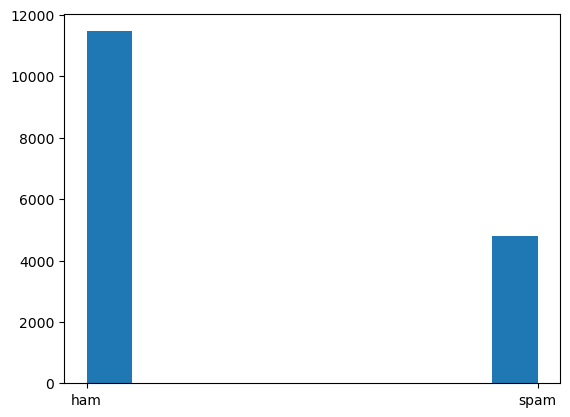

In [9]:
plt.hist(df['text_type'])
plt.show()

In [21]:
df['status']=df['text_type'].apply(lambda x:1 if x=='spam' else 0)
df = df.drop(['text_type'],axis=1)
df.head(5)

,text,status
0,make sure alex knows his birthday is over in f...,0
1,a resume for john lavorato thanks vince i will...,0
2,plzz visit my website moviesgodml to get all m...,1
3,urgent your mobile number has been awarded wit...,1
4,overview of hr associates analyst project per ...,0


## Деление на сет для обучения и для валидации

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df.text,df.status,test_size=0.25)

In [30]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [31]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
test_df = df['text'].iloc[90:95]
test_df_status = df['status'].iloc[90:95]
print(test_df)

90                                r u still working now
91                                  should work i guess
92    norton systemworks 2002 final clearance 1093 n...
93    urban boquist wrote if i run spamassassin on t...
94    its said winner never quit i try up my faith t...
Name: text, dtype: object


## Получение предсказаний

In [41]:
test_df_pred = clf.predict(test_df)

In [48]:
for i in range(5):
    print (f"Пример номер {i}:")
    print(test_df_pred[i])
    print(test_df_status.iloc[i])

Пример номер 0:
0
0
Пример номер 1:
0
0
Пример номер 2:
1
1
Пример номер 3:
0
0
Пример номер 4:
1
1


In [51]:
y_pred_df = clf.predict(X_test)

## ROC_AUC на валидационном сете

In [52]:
print(roc_auc_score(y_test, y_pred_df))

0.9107559811264542


## Получение прогноза на тестовом сете

In [53]:
df_test = pd.read_csv('test_spam.csv')
df_test.head()

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...


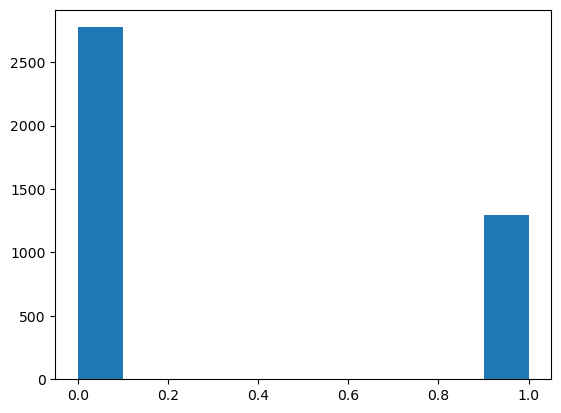

In [57]:
y_pred_df = clf.predict(df_test['text'])
plt.hist(y_pred_df)
plt.show()

In [58]:
df_test['score'] = y_pred_df

In [60]:
df_test.head()

,text,score
0,j jim whitehead ejw cse ucsc edu writes j you ...,0
1,original message from bitbitch magnesium net p...,0
2,java for managers vince durasoft who just taug...,0
3,there is a youtuber name saiman says,0
4,underpriced issue with high return on equity t...,1


## Экспорт датасета

In [61]:
df_test.to_csv('score.csv')